In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

np.random.seed(35)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, '0')

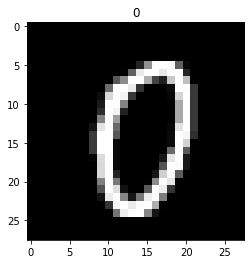

In [3]:
plt.imshow(X_train[1000], cmap='gray')
plt.title(y_train[1000])

Text(0.5, 1.0, '7')

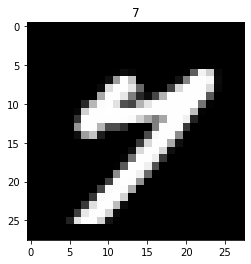

In [4]:
plt.imshow(X_train[1001], cmap='gray')
plt.title(y_train[1001])

Text(0.5, 1.0, '1')

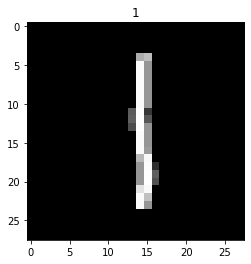

In [5]:
plt.imshow(X_train[1002], cmap='gray')
plt.title(y_train[1002])

Text(0.5, 1.0, '1')

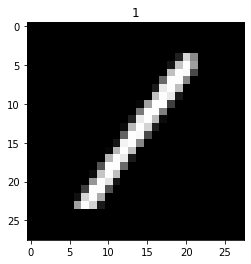

In [6]:
plt.imshow(X_train[1003], cmap='gray')
plt.title(y_train[1003])

In [7]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255 

In [8]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[10], Y_train[10]

(3, array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [9]:
model = Sequential()

model.add(Dense(512, input_dim=784,activation='relu'))
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.
#model.add(Activation('relu'))
# Dropout helps protect the model from memorizing or "overfitting" the training data
#model.add(Dropout(0.2))

model.add(Dense(256,activation='relu'))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
#model.add(Activation('softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [12]:
size = int(len(X_train) * 0.8)

train_x, val_x = X_train[:size], X_train[size:]
train_y, val_y = Y_train[:size], Y_train[size:]

In [13]:
hist = model.fit(train_x, train_y, batch_size=128, epochs=20, validation_data=(val_x, val_y))

Epoch 1/20
375/375 [==============================] - 7s 18ms/step - loss: 0.2539 - accuracy: 0.9252 - val_loss: 0.1513 - val_accuracy: 0.9512
Epoch 2/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0920 - accuracy: 0.9717 - val_loss: 0.1098 - val_accuracy: 0.9668
Epoch 3/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0602 - accuracy: 0.9819 - val_loss: 0.0971 - val_accuracy: 0.9701
Epoch 4/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0413 - accuracy: 0.9867 - val_loss: 0.0940 - val_accuracy: 0.9720
Epoch 5/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0306 - accuracy: 0.9905 - val_loss: 0.0918 - val_accuracy: 0.9753
Epoch 6/20
375/375 [==============================] - 6s 17ms/step - loss: 0.0266 - accuracy: 0.9913 - val_loss: 0.1307 - val_accuracy: 0.9662
Epoch 7/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0997 - val_accuracy: 0.9739

In [14]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0993 - accuracy: 0.9793

Test accuracy:  0.9793000221252441


In [15]:
import numpy as np
from keras.preprocessing import image
#test_image = image.load_img('X_test[1000]')
#test_image = image.img_to_array(test_image)
#test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(X_train)
#predictions = lm.predict(X_test)

In [16]:
result[1000]

array([1.0000000e+00, 1.8435761e-12, 2.3920248e-09, 1.2837341e-11,
       2.1765686e-12, 4.9425356e-13, 4.7542176e-08, 8.4963617e-13,
       2.8628772e-10, 2.6702898e-08], dtype=float32)

In [17]:
result[1001]

array([8.1010570e-15, 1.6911547e-10, 5.6799292e-13, 4.2253747e-15,
       1.9147723e-05, 8.4381697e-16, 4.0745486e-18, 9.9994206e-01,
       1.7257376e-13, 3.8691123e-05], dtype=float32)

In [18]:
result[1002]

array([8.37469649e-10, 9.99991059e-01, 7.90298245e-08, 5.71859005e-10,
       2.34425286e-07, 1.39271066e-07, 1.10389976e-07, 9.57966449e-07,
       7.40470477e-06, 3.76970313e-08], dtype=float32)

In [19]:
result[1003]

array([5.0686207e-17, 1.0000000e+00, 1.3646192e-14, 8.1148631e-21,
       1.3114939e-13, 1.1462677e-18, 4.7108505e-17, 5.4173856e-15,
       2.2838418e-15, 4.1652481e-17], dtype=float32)